In [110]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)



In [144]:

df_raw = pd.read_csv("F1Drivers_Dataset (1).csv")
df_raw.head(10)


,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Active,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,False,NaN,1960,0.000000,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,False,NaN,1950,0.000000,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,False,NaN,1980,0.000000,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,6.0,False,NaN,1970,0.000000,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,False,NaN,1990,0.000000,1.000000,0.0,0.0,0.0,0.000000,1,False
5,Walt Ader,United States,[1950],0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,False,NaN,1950,0.000000,1.000000,0.0,0.0,0.0,0.000000,1,False
6,Kurt Adolff,West Germany,[1953],0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,False,NaN,1950,0.000000,1.000000,0.0,0.0,0.0,0.000000,1,False
7,Fred Agabashian,United States,"[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957]",0.0,9.0,8.0,1.0,0.0,0.0,0.0,1.5,False,NaN,1950,0.111111,0.888889,0.0,0.0,0.0,0.166667,8,False
8,Kurt Ahrens Jr.,West Germany,"[1966, 1967, 1968, 1969]",0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,False,NaN,1970,0.000000,1.000000,0.0,0.0,0.0,0.000000,4,False
9,Jack Aitken,United Kingdom,[2020],0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,False,NaN,2020,0.000000,1.000000,0.0,0.0,0.0,0.000000,1,False


In [145]:
print(df_raw[df_raw["Champion"].astype(str).str.lower() == "true"]["Driver"].nunique())

34


In [146]:

df_raw.info()
df_raw.describe(include='all')
df_raw.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver              868 non-null    object 
 1   Nationality         868 non-null    object 
 2   Seasons             868 non-null    object 
 3   Championships       868 non-null    float64
 4   Race_Entries        868 non-null    float64
 5   Race_Starts         868 non-null    float64
 6   Pole_Positions      868 non-null    float64
 7   Race_Wins           868 non-null    float64
 8   Podiums             868 non-null    float64
 9   Fastest_Laps        868 non-null    float64
 10  Points              868 non-null    float64
 11  Active              868 non-null    bool   
 12  Championship Years  34 non-null     object 
 13  Decade              868 non-null    int64  
 14  Pole_Rate           868 non-null    float64
 15  Start_Rate          868 non-null    float64
 16  Win_Rate

Driver                  0
Nationality             0
Seasons                 0
Championships           0
Race_Entries            0
Race_Starts             0
Pole_Positions          0
Race_Wins               0
Podiums                 0
Fastest_Laps            0
Points                  0
Active                  0
Championship Years    834
Decade                  0
Pole_Rate               0
Start_Rate              0
Win_Rate                0
Podium_Rate             0
FastLap_Rate            0
Points_Per_Entry        0
Years_Active            0
Champion                0
dtype: int64

In [147]:

df = df_raw.copy()

df["Champion_Binary"] = df["Champion"].astype(int)
df = df.drop(columns=["Championship Years","Seasons", "Championships", "Active","Decade","Champion"])



for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

df.head(10)

,Driver,Nationality,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion_Binary
0,Carlo Abate,Italy,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,2,0
1,George Abecassis,United Kingdom,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,2,0
2,Kenny Acheson,United Kingdom,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.300000,0.0,0.0,0.0,0.000000,2,0
3,Andrea de Adamich,Italy,36.0,30.0,0.0,0.0,0.0,0.0,6.0,0.000000,0.833333,0.0,0.0,0.0,0.166667,5,0
4,Philippe Adams,Belgium,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,1,0
5,Walt Ader,United States,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,1,0
6,Kurt Adolff,West Germany,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,1,0
7,Fred Agabashian,United States,9.0,8.0,1.0,0.0,0.0,0.0,1.5,0.111111,0.888889,0.0,0.0,0.0,0.166667,8,0
8,Kurt Ahrens Jr.,West Germany,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,4,0
9,Jack Aitken,United Kingdom,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,1,0


In [148]:
print(df[df["Champion_Binary"] > 0]["Driver"].nunique())
print(df[df["Race_Entries"] < 10]["Driver"].nunique())

34
489


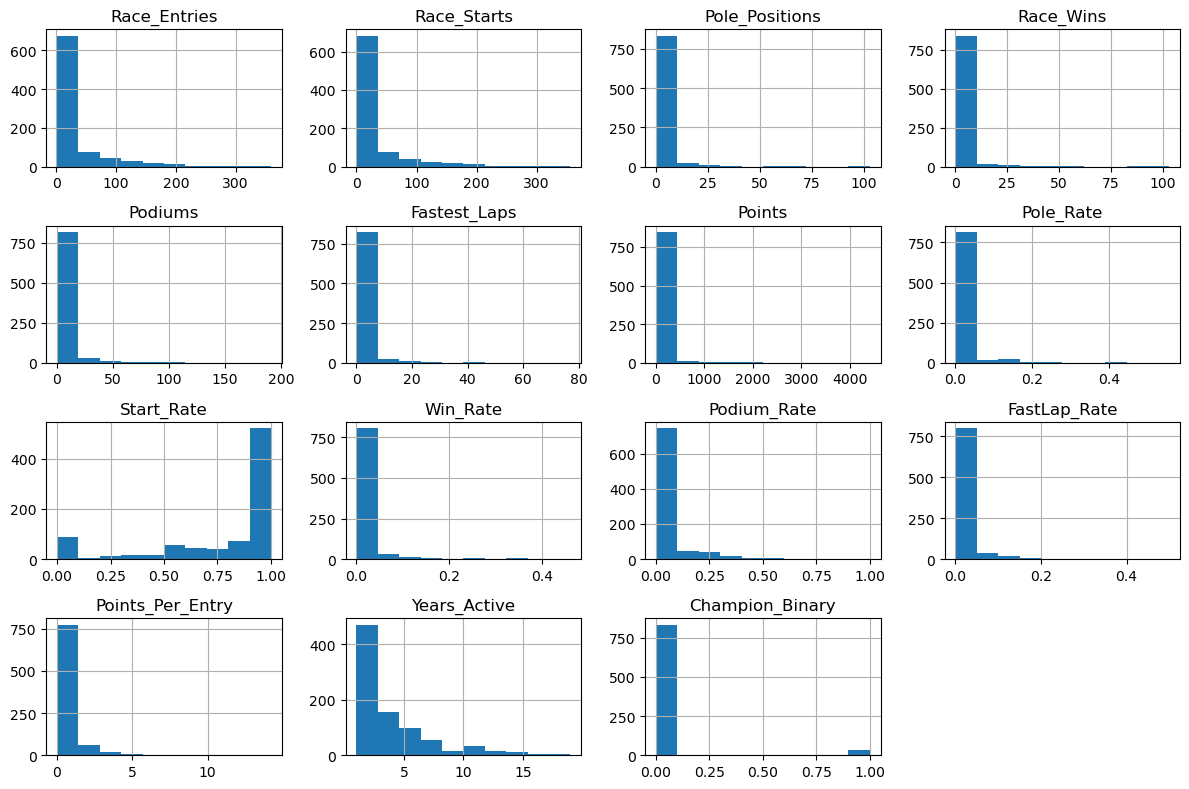

In [149]:

df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


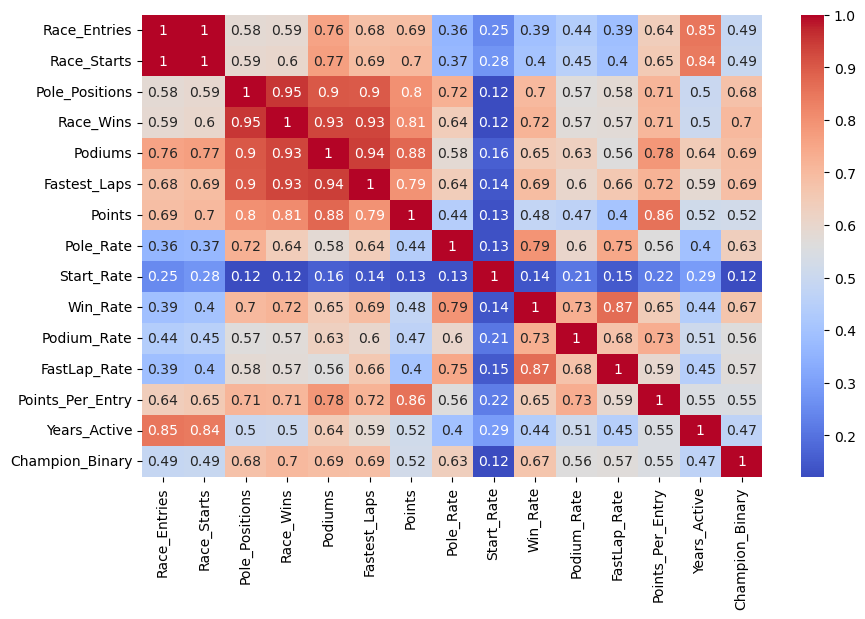

In [150]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


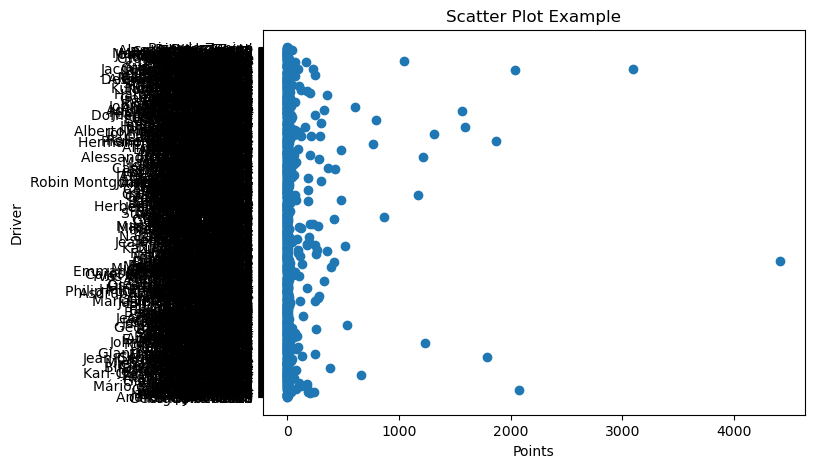

more than 25 points
140
any points
348
total drivers


868

In [151]:

plt.figure(figsize=(7,5))
plt.scatter(df.iloc[:,8], df.iloc[:,0])
plt.xlabel(df.columns[8])
plt.ylabel(df.columns[0])
plt.title("Scatter Plot Example")
plt.show()
print('more than 25 points')
print(df[df["Points"] > 24]["Driver"].nunique())
print('any points')
print(df[df["Points"] > 0]["Driver"].nunique())
print('total drivers')
df["Driver"].nunique()




## for reference under the current rules top 10 drivers get points

In [152]:

target = "Champion_Binary"   
X = df.drop(target, axis=1)
y = df[target]


X = pd.get_dummies(X, drop_first=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [153]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=1,stratify=y
)


In [154]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


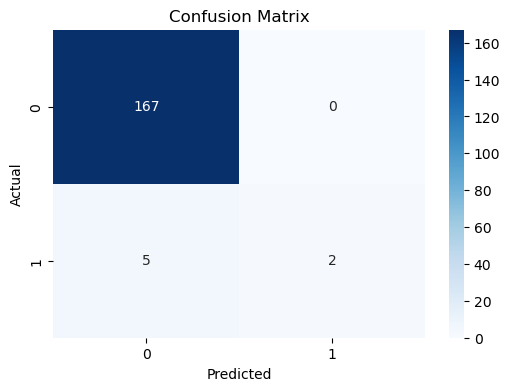

In [155]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [156]:

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       167
           1       1.00      0.29      0.44         7

    accuracy                           0.97       174
   macro avg       0.99      0.64      0.71       174
weighted avg       0.97      0.97      0.96       174

